In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns 
plt.style.use("ggplot")
pd.set_option("display.max_columns" ,40) # to see all the columns(here 40) for bigger datasets

In [35]:
# readign data using pandas lib
df = pd.read_csv("train.csv")
print(f"the dataframe has [{df.shape[0]}] rows and [{df.shape[1]}] columns")
print(f"the columns are : \n{df.columns}")

the dataframe has [891] rows and [12] columns
the columns are : 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [36]:
# df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]


each columns has : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 null values


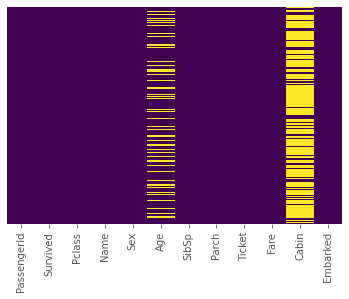

In [37]:
print(f"each columns has : \n{df.isnull().sum()} null values") # how many null does each columns have
# print(f"rows with missing values are : \n{df[df.isnull().any(axis=1)].head(20)}") # all te rows that have at least one missing value 
# heatmap of the missing values 
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()


In [38]:
# convering sex to numeric values 
df['Sex'] = df['Sex'].map({'male':0 , 'female':1}) # male = 0 , female = 1 

In [44]:
print(F"unique values for Embarked is : {df['Embarked'].unique()}")
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # if both Q ,S are zero then we can say that it's C

unique values for Embarked is : ['S' 'C' 'Q' nan]


In [ ]:
df.drop(['Name' , 'Ticket' , 'Cabin'] ,axis=1 , inplace=True) # removign these becuase they dont effect the training

In [ ]:
# trying to nomalize the dataset
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # THE SET values between 0 ,1 
df[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(df[['Age', 'Fare', 'SibSp', 'Parch']])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,0.271174,0.125,0.0,0.014151,False,True
1,2,1,1,1,0.472229,0.125,0.0,0.139136,False,False
2,3,1,3,1,0.321438,0.000,0.0,0.015469,False,True
3,4,1,1,1,0.434531,0.125,0.0,0.103644,False,True
4,5,0,3,0,0.434531,0.000,0.0,0.015713,False,True
